In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import datetime
from tqdm import tqdm
date_time_obj=[]
dyear=[]
dmonth=[]
dday=[]
dhour=[]
dmin=[]
dsec=[]

#1) DATA COLLECTION PHASE
data=pd.read_excel(r"C:\Users\xboxm\vs_workspace\github_projects\statistical_earthquake_prediction\data_proje2.xlsx")

#2) DATA PREPERATION PHASE
for n in tqdm(range(len(data.eventDate))):
    date_time_obj.append(datetime.datetime.strptime(data.eventDate[n][0:10]+" "+data.eventDate[n][11:22], '%Y-%m-%d %H:%M:%S'))

    dyear.append(date_time_obj[n].year)
    dmonth.append(date_time_obj[n].month)
    dday.append(date_time_obj[n].day)
    dhour.append(date_time_obj[n].hour)
    dmin.append(date_time_obj[n].minute)
    dsec.append(date_time_obj[n].second)


df=pd.DataFrame(data=data.eventId,columns=["eventId"])

col_name=["date","year","month","day","hour","minute","second","latitude","longitude","depth","magnitude"]
var_name=[date_time_obj,dyear,dmonth,dday,dhour,dmin,dsec,data.latitude,data.longitude,data.depth,data.magnitude]
for i in range(len(col_name)):
    df[col_name[i]]=(var_name[i])

df

100%|██████████| 1377/1377 [00:00<00:00, 63015.47it/s]


,eventId,date,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude
0,535389,2022-11-05 02:36:28,2022,11,5,2,36,28,37.3040,36.2460,9.14,2.2
1,535108,2022-11-02 06:25:26,2022,11,2,6,25,26,37.2850,36.2680,7.00,1.1
2,534970,2022-10-30 08:44:57,2022,10,30,8,44,57,37.3510,36.3690,7.00,1.3
3,534964,2022-10-30 07:46:35,2022,10,30,7,46,35,37.3500,36.2530,7.00,1.0
4,534852,2022-10-28 04:26:05,2022,10,28,4,26,5,37.3180,36.2930,7.15,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...
1372,51103,2007-02-13 06:42:36,2007,2,13,6,42,36,37.4122,36.4667,7.06,2.2
1373,50424,1999-11-01 19:56:27,1999,11,1,19,56,27,37.3000,36.3300,5.00,4.1
1374,49985,1998-10-18 08:37:45,1998,10,18,8,37,45,37.3000,36.3200,7.00,4.0
1375,48637,1991-09-26 20:24:09,1991,9,26,20,24,9,37.3370,36.2680,41.30,4.7


100%|██████████| 1377/1377 [00:00<00:00, 1596.77it/s]


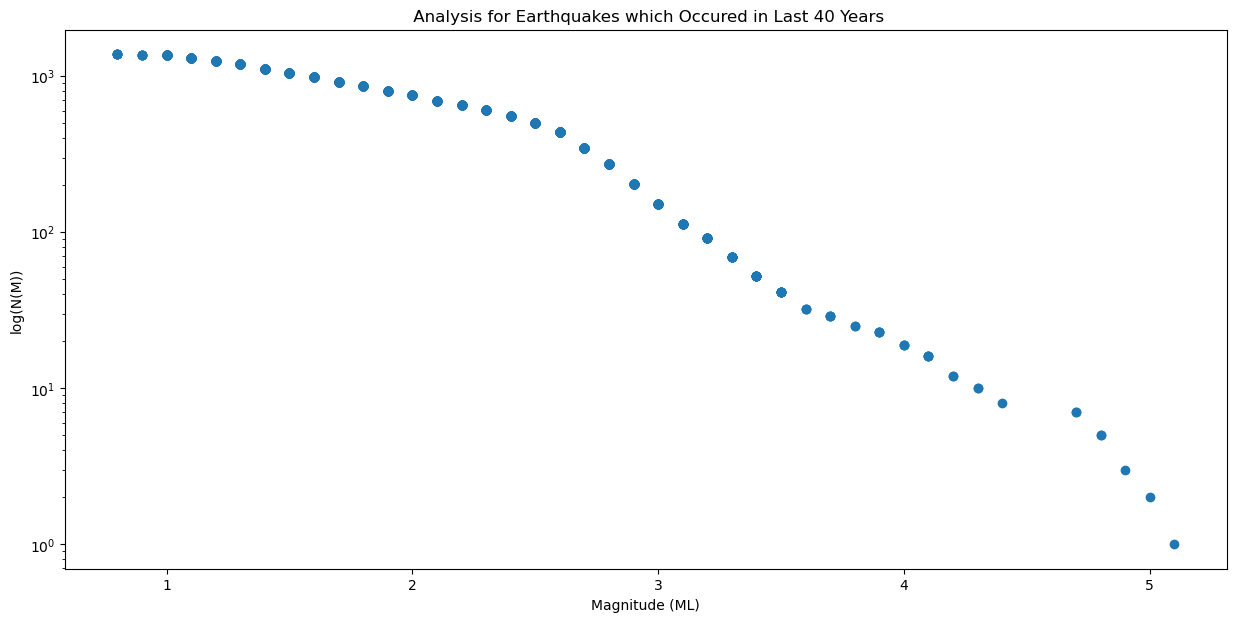

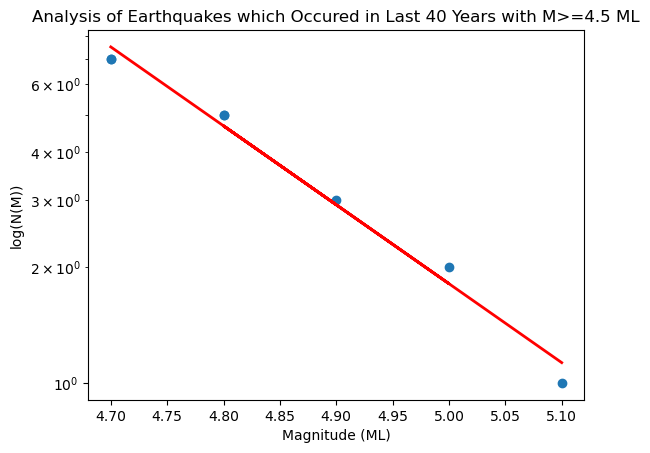

a: 10.540966771698079
b: 2.0564847077294814
The Largest Possible Earthquake Magnitude in a 40-Year Period: 5.904749360588673


Text(0, 0.5, 'Number of Earthquakes')

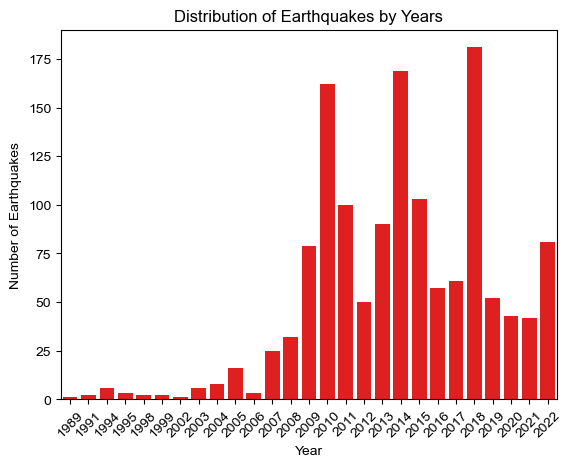

In [3]:
import numpy as np
import math
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

last40=df[df.year>=max(df.date).year-40]
last40=last40[last40.magnitude>=4.5]

m_list=list(last40.magnitude)
y=[]

for x in tqdm(m_list):
    y.append(np.log10(last40[last40.magnitude>=x].count()[0]))

last40d=df[df.year>=max(df.date).year-40]
m_list1=list(last40d.magnitude)
y1=[]
for x in tqdm(m_list1):
    y1.append(np.log10(last40d[last40d.magnitude>=x].count()[0]))



#3) DATA PROCESSING AND VISUALIZATION PHASE
x=np.array(m_list).reshape((-1,1))
y=np.array(y).reshape(-1,1)


model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)

y_pred =(model.intercept_ + model.coef_ * x)

# Output or Predicted Value of data

Tr=40

a=model.intercept_[0]
b=abs(model.coef_[0][0])

M_Tr=(a+np.log10(Tr))/b

plt.figure(figsize=(15,7))

plt.grid()
plt.scatter(m_list1,10**np.array(y1))
plt.title(" Analysis for Earthquakes which Occured in Last 40 Years")
plt.xlabel("Magnitude (ML)")
plt.ylabel("log(N(M))")
plt.yscale('log',base=10) 
plt.grid()
plt.show()




plt.grid()
plt.scatter(m_list,10**np.array(y))
plt.plot(x, 10**y_pred, color='red', linewidth=2)
plt.title("Analysis of Earthquakes which Occured in Last 40 Years with M>=4.5 ML")
plt.xlabel("Magnitude (ML)")
plt.ylabel("log(N(M))")
plt.yscale('log',base=10) 
plt.grid()
plt.show()

print(f"a: {model.intercept_[0]}")
print(f"b: {abs(model.coef_[0][0])}")
print(f"The Largest Possible Earthquake Magnitude in a 40-Year Period: {M_Tr}")

hist_data=last40d.loc[last40d.year>=max(df.date).year-40].groupby(["year"])["magnitude"].agg(["mean","count","max"])
hist_data_x=hist_data.to_numpy()

init_hist_x=hist_data_x[:,1]
sns.barplot(y=init_hist_x, x=hist_data.index.to_numpy(),color="r")
sns.set_style('whitegrid')

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.title("Distribution of Earthquakes by Years")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")




[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

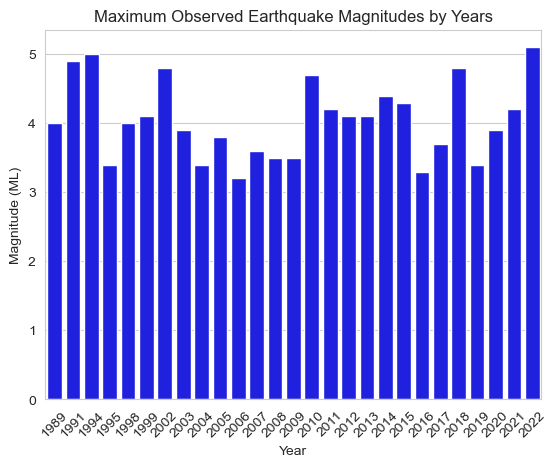

In [4]:
sns.barplot(y=hist_data_x[:,2], x=hist_data.index.to_numpy(),color="b")
sns.set_style('whitegrid')
plt.title("Maximum Observed Earthquake Magnitudes by Years")
plt.xlabel("Year")
plt.ylabel("Magnitude (ML)")

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)